In [2]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

класс нейронки

In [3]:
class Hebb:
    def __init__(self, w, b, rate) -> None:
        self.w = w 
        self.b = b
        self.rate = rate

    def feed(self,inpt,nulls=False):
        result = inpt @ self.w - self.b
        result[result > 0] = 1
        result[result <= 0] = -1
        if nulls:
           result[result == -1] = 0 
        return result
    
    def delta(self,inpt,outpt):
        fd = self.feed(inpt)
        self.w = self.w + (inpt.T @ (outpt - fd)) * self.rate
        for i in outpt:
            self.b = self.b - i


### ------------------ Вариант из методички -----------------------

In [159]:
X = np.array([[-1,-1,],[1,-1],[-1,1],[1,1]])
Y = np.array([-1,-1,-1,1])
W = np.zeros(2)
hb = Hebb(W,0,1)

for x in range(3):
    hb.delta(X,Y)

In [160]:
hb.feed([[-1,-1,],[1,-1],[-1,1],[1,1]])

array([-1., -1., -1., -1.])

### ------------------------ Конец варианта из методички ----------------------

### Циферки гадать

### Представление чисел подаваемых на вход
![jupyter](./number_image.jpg)

In [14]:
X = np.array([
[1,1,1,1,0,1,1,0,1,1,0,1,1,1,1],
[0,1,0,1,1,0,0,1,0,0,1,0,1,1,1],
[1,1,1,0,0,1,0,1,0,1,0,0,1,1,1],
[1,1,1,0,0,1,0,1,1,0,0,1,1,1,1],
[1,0,1,1,0,1,1,1,1,0,0,1,0,0,1],
[1,1,1,1,0,0,1,1,1,0,0,1,1,1,1],
[1,1,1,1,0,0,1,1,1,1,0,1,1,1,1],
[1,1,1,0,0,1,0,1,0,0,1,0,0,1,0],
[1,1,1,1,0,1,1,1,1,1,0,1,1,1,1],
[1,1,1,1,0,1,1,1,1,0,0,1,1,1,1]
])
X[X ==0] = -1
Y = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],
[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1]],dtype=int)
Y[Y ==0] = -1
W = np.zeros((X.shape[1],Y.shape[1]))
hb = Hebb(W,0,1)


* обучение сети

In [5]:
learn_hist = [0]
while True:
    hb.delta(X,Y)

    Y_pr = Y.copy()
    Y_pr[Y_pr==-1] = 0
    auc = accuracy_score(Y_pr,hb.feed(X,nulls=True).astype(int))
    learn_hist.append(auc)
    #остановка
    if auc == 1:
        break

In [29]:
hb.delta(X,Y)

In [224]:
hb.feed(X,nulls=True)

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 1.],
       [1., 1., 0., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 1.],
       [1., 0., 1., 0.],
       [1., 0., 0., 1.]])

* результат обучения

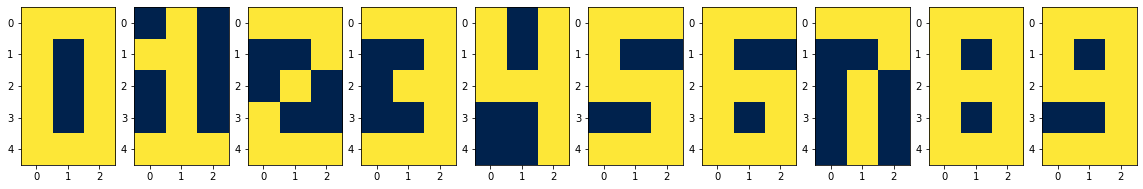

In [30]:
fig, axs = plt.subplots(1,10,figsize=(20,10))

res = hb.feed(X,nulls=True)
for num in range(len(res)): 
    ls = res[num].astype(int).tolist()
    bn = ''.join(map(str,ls))
    if int(bn,2) < len(res):
        axs[num].imshow(X[int(bn,2)].reshape(-1,3),cmap='cividis')
    else:
        axs[num].imshow(np.ones(15).reshape(-1,3))


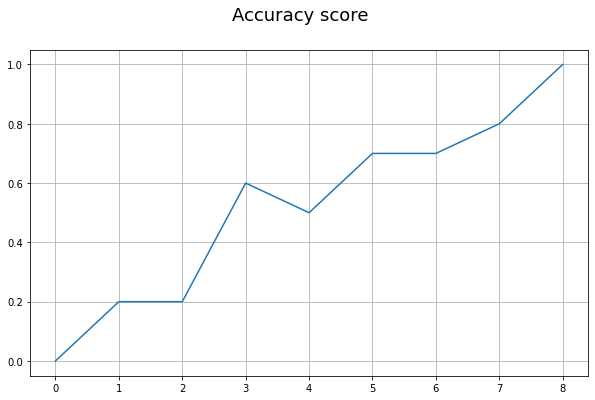

In [235]:
fig, axs = plt.subplots(1,1,figsize=(10,6))
fig.suptitle("Accuracy score",fontsize=18)
plt.plot(np.array([x for x in range(len(learn_hist))]),np.array(learn_hist))
plt.grid()
plt.show()